In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)



In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=4, weights="uniform")

knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.9916666666666667

### Grid Search

In [8]:
param_grid = [
    {
        'weights': ['uniform'],
        'n_neighbors': [i for i in range(1,11)]
        
    },
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1,11)],
        'p': [i for i in range(1, 6)]
        
    }
]

In [9]:
knn_clf = KNeighborsClassifier()

In [10]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(knn_clf,param_grid)

In [11]:
%%time
grid_search.fit(X_train, y_train)

CPU times: user 2min 30s, sys: 619 ms, total: 2min 31s
Wall time: 2min 32s


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [12]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=3,
           weights='distance')

In [13]:
grid_search.best_score_

0.9853862212943633

In [16]:
grid_search.best_params_

{'n_neighbors': 3, 'p': 3, 'weights': 'distance'}

In [17]:
grid_search.score(X_test, y_test)

0.9833333333333333

In [18]:
%%time
grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=-1, verbose=2)
#n_jobs 表示使用计算机多少线程处理，verbose表示显示计算过程

grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] n_neighbors=1, weights=uniform ..................................
[CV] n_neighbors=1, weights=uniform ..................................
[CV] n_neighbors=1, weights=uniform ..................................
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   0.2s
[CV] ................... n_neighbors=1, weights=uniform, total=   0.1s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   0.2s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=2, weights=uniform, total=   0.1s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=2, weights=uniform, total=   0.2s
[CV] n_neighbor

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.2s


[CV] ............. n_neighbors=1, p=2, weights=distance, total=   0.2s
[CV] n_neighbors=1, p=4, weights=distance ............................
[CV] ............. n_neighbors=1, p=3, weights=distance, total=   1.0s
[CV] n_neighbors=1, p=4, weights=distance ............................
[CV] ............. n_neighbors=1, p=3, weights=distance, total=   1.1s
[CV] n_neighbors=1, p=4, weights=distance ............................
[CV] ............. n_neighbors=1, p=3, weights=distance, total=   1.2s
[CV] n_neighbors=1, p=5, weights=distance ............................
[CV] ............. n_neighbors=1, p=4, weights=distance, total=   1.0s
[CV] n_neighbors=1, p=5, weights=distance ............................
[CV] ............. n_neighbors=1, p=4, weights=distance, total=   0.8s
[CV] n_neighbors=1, p=5, weights=distance ............................
[CV] ............. n_neighbors=1, p=4, weights=distance, total=   0.9s
[CV] n_neighbors=2, p=1, weights=distance ............................
[CV] .

[CV] ............. n_neighbors=5, p=2, weights=distance, total=   0.1s
[CV] n_neighbors=5, p=3, weights=distance ............................
[CV] ............. n_neighbors=4, p=5, weights=distance, total=   1.0s
[CV] n_neighbors=5, p=3, weights=distance ............................
[CV] ............. n_neighbors=4, p=5, weights=distance, total=   1.0s
[CV] n_neighbors=5, p=4, weights=distance ............................
[CV] ............. n_neighbors=5, p=3, weights=distance, total=   1.2s
[CV] n_neighbors=5, p=4, weights=distance ............................
[CV] ............. n_neighbors=5, p=3, weights=distance, total=   1.1s
[CV] ............. n_neighbors=5, p=3, weights=distance, total=   1.1s
[CV] n_neighbors=5, p=4, weights=distance ............................
[CV] n_neighbors=5, p=5, weights=distance ............................
[CV] ............. n_neighbors=5, p=4, weights=distance, total=   1.0s
[CV] n_neighbors=5, p=5, weights=distance ............................
[CV] .

[CV] n_neighbors=9, p=2, weights=distance ............................
[CV] n_neighbors=9, p=2, weights=distance ............................
[CV] ............. n_neighbors=9, p=2, weights=distance, total=   0.1s
[CV] n_neighbors=9, p=3, weights=distance ............................
[CV] ............. n_neighbors=9, p=2, weights=distance, total=   0.1s
[CV] n_neighbors=9, p=3, weights=distance ............................


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min


[CV] ............. n_neighbors=8, p=5, weights=distance, total=   1.0s
[CV] n_neighbors=9, p=3, weights=distance ............................
[CV] ............. n_neighbors=8, p=5, weights=distance, total=   1.1s
[CV] n_neighbors=9, p=4, weights=distance ............................
[CV] ............. n_neighbors=9, p=3, weights=distance, total=   1.2s
[CV] n_neighbors=9, p=4, weights=distance ............................
[CV] ............. n_neighbors=9, p=3, weights=distance, total=   1.3s
[CV] n_neighbors=9, p=4, weights=distance ............................
[CV] ............. n_neighbors=9, p=3, weights=distance, total=   1.1s
[CV] n_neighbors=9, p=5, weights=distance ............................
[CV] ............. n_neighbors=9, p=4, weights=distance, total=   1.1s
[CV] n_neighbors=9, p=5, weights=distance ............................
[CV] ............. n_neighbors=9, p=4, weights=distance, total=   1.1s
[CV] n_neighbors=9, p=5, weights=distance ............................
[CV] .

[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.3min finished


### 其他距离

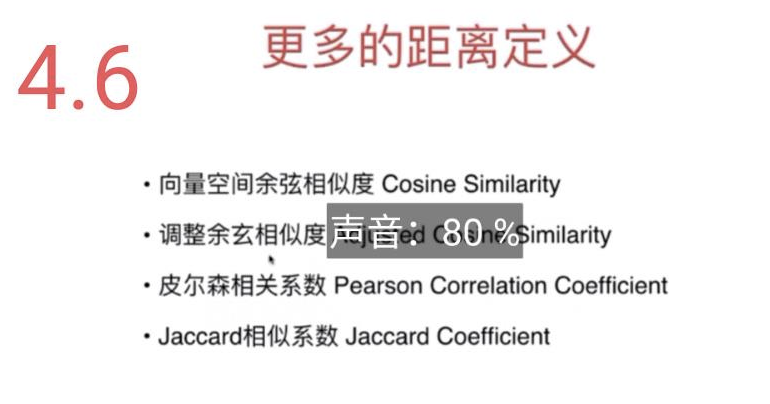
